# Classification - Balanced Dataset 

In [36]:
# Import the dataset
# Import the basic packages

import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

# Assign the features and target to relevant variables
X = cancer.data
y = cancer.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [38]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

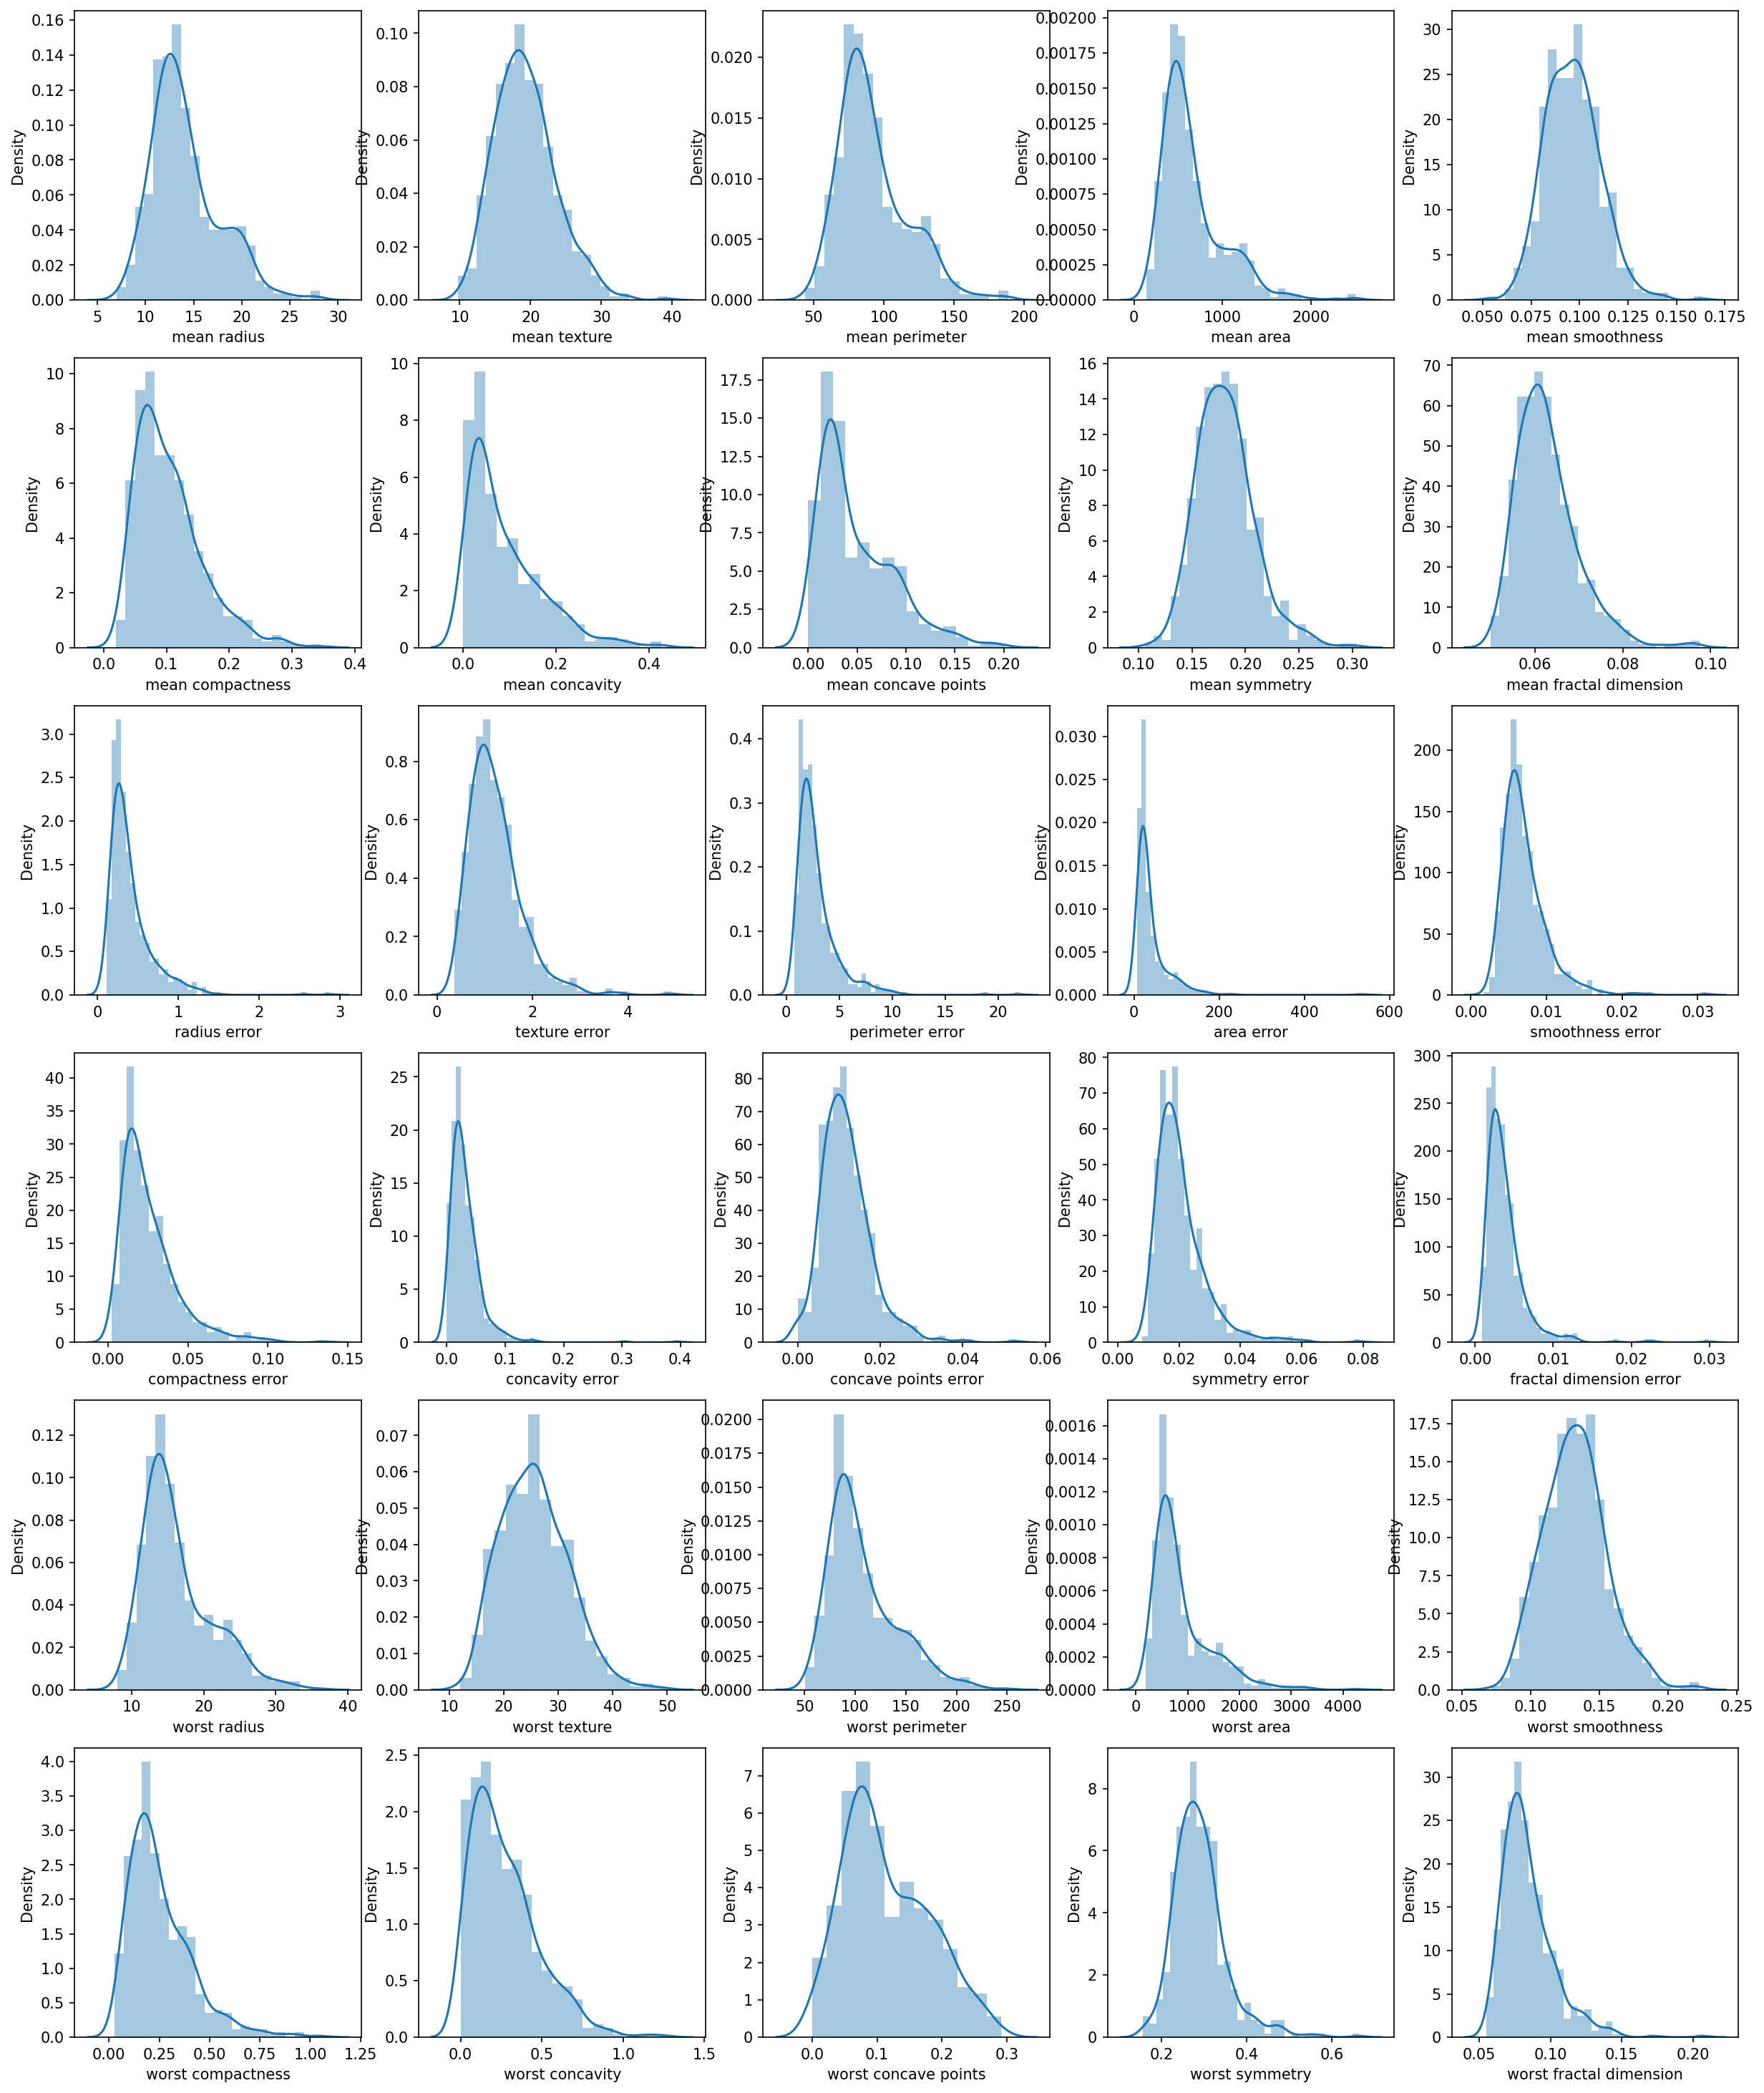

In [40]:
# Create histogram for features using subplot.
fig, axis = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 25), dpi = 150) 

# For 30 features, create subplot having 6 rows and 5 columns.
count = 0

for i in range(0, 6):
  for j in range (0, 5):
    column = df.iloc[:, count]      # Fetching the current column and all rows of that column.
 
    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1

plt.show()

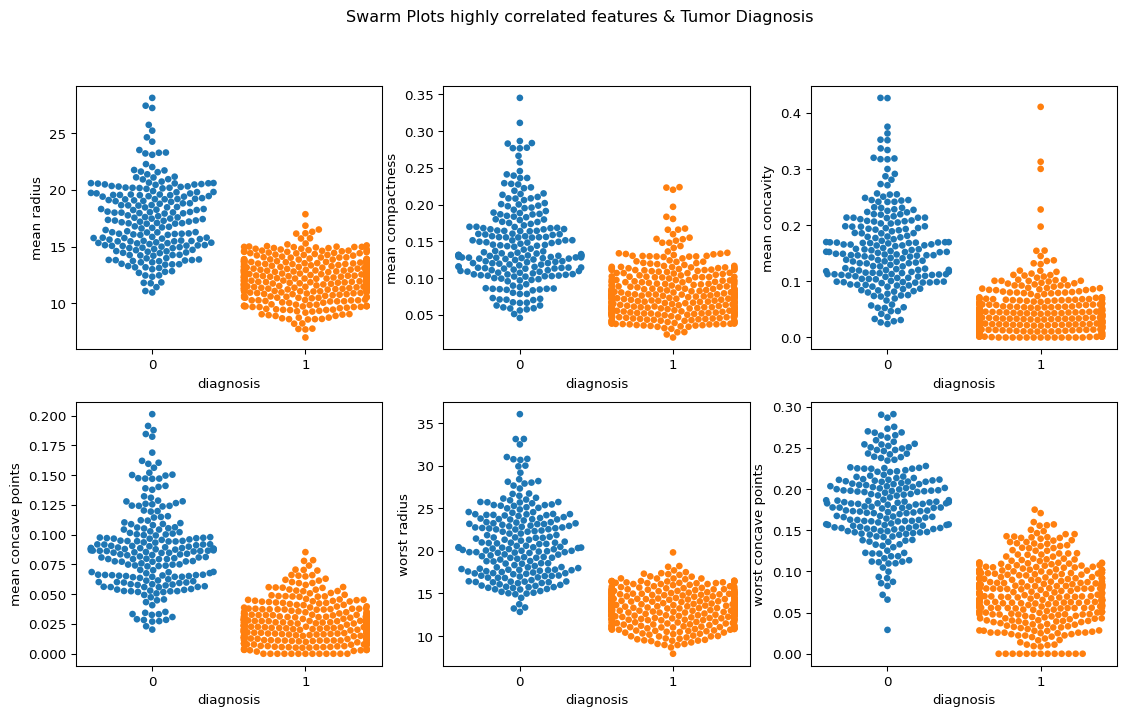

In [41]:
# Swarmplot for highly correlated features vs tumor diagnosis
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

# Define the plots
sns.swarmplot(x=df['diagnosis'], y=df['mean radius'], ax = axis[0, 0])
sns.swarmplot(x=df['diagnosis'], y=df['mean compactness'], ax = axis[0, 1])
sns.swarmplot(x=df['diagnosis'], y=df['mean concavity'], ax = axis[0, 2])
sns.swarmplot(x=df['diagnosis'], y=df['mean concave points'], ax = axis[1, 0])
sns.swarmplot(x=df['diagnosis'], y=df['worst radius'], ax = axis[1, 1])
sns.swarmplot(x=df['diagnosis'], y=df['worst concave points'], ax = axis[1, 2])
fig.suptitle('Swarm Plots highly correlated features & Tumor Diagnosis')
plt.show()

In [42]:
# Import the required package
from sklearn.model_selection import train_test_split

# Obtain separate DataFrames for features and target label respectively
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Perform the train-test split operation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Logistic Regression

In [43]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
# Instantiate a Logistic Regression Model
modelLR= LogisticRegression()

# Fit the model using train dataset
modelLR.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= modelLR.predict(X_test)

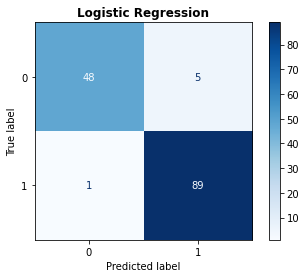

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391


In [45]:
# Define a DataFrame to store the classifier performance metrics
results_df = pd.DataFrame(
    data=[["Logistic Regression", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Save the confusion matrix for the Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)

# Customise and display the confusion matrix appearance
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression", fontweight= "bold")
plt.show()

# Display the performance metric DataFrame
results_df

# KNN Classifier

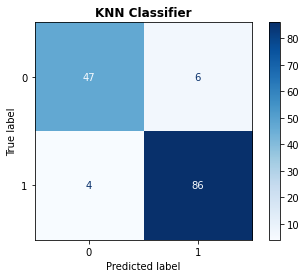

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055


In [46]:
# Import the required package
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

# Fit the model using train dataset
knn_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= knn_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
knn_results_df = pd.DataFrame(
    data=[["KNN Classifier", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(knn_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN Classifier", fontweight= "bold")
plt.show()

results_df

In [47]:
# Import the required package
from sklearn.preprocessing import StandardScaler

# Define the scaler object and transform the features
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

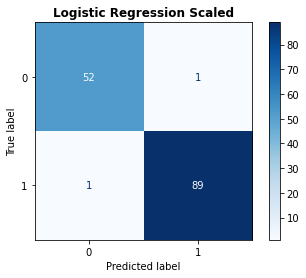

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889


In [48]:
# Fit the model on the scaled features
modelLR.fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred= modelLR.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
lr_scaled_results_df = pd.DataFrame(
    data=[["Logistic Regression Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(lr_scaled_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression Scaled", fontweight= "bold")
plt.show()

results_df

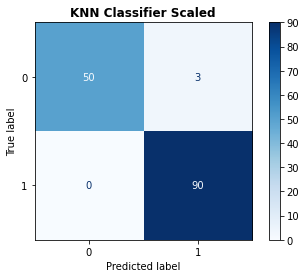

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889
3,KNN Classifier Scaled,0.979021,0.967742,1.000000,0.983607


In [49]:
# Fit the model on the scaled features
knn_model.fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred= knn_model.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
knn_scaled_results_df = pd.DataFrame(
    data=[["KNN Classifier Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(knn_scaled_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN Classifier Scaled", fontweight= "bold")
plt.show()

results_df

# SVC

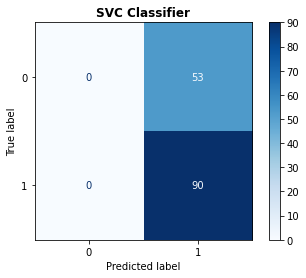

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889
3,KNN Classifier Scaled,0.979021,0.967742,1.000000,0.983607
4,SVC Classifier,0.629371,0.629371,1.000000,0.772532


In [50]:
# Import the required packacges
from sklearn.svm import SVC

# Instantiate and fit the Support Vector Classifier model
svc_model = SVC(gamma=.1).fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= svc_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
svc_results_df = pd.DataFrame(
    data=[["SVC Classifier", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(svc_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC Classifier", fontweight= "bold")
plt.show()

results_df

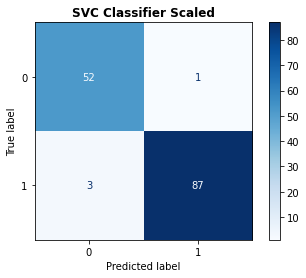

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889
3,KNN Classifier Scaled,0.979021,0.967742,1.000000,0.983607
4,SVC Classifier,0.629371,0.629371,1.000000,0.772532
5,SVC Scaled,0.972028,0.988636,0.966667,0.977528


In [51]:
# Instantiate and fit the Support Vector Classifier model
svc_model = SVC(gamma=.1).fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred= svc_model.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
svc_scaled_results_df = pd.DataFrame(
    data=[["SVC Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(svc_scaled_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC Classifier Scaled", fontweight= "bold")
plt.show()

results_df

# Decision Tree

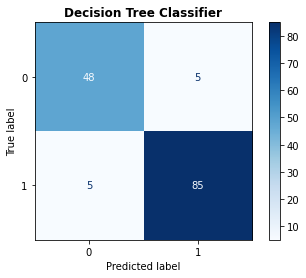

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889
3,KNN Classifier Scaled,0.979021,0.967742,1.000000,0.983607
4,SVC Classifier,0.629371,0.629371,1.000000,0.772532
5,SVC Scaled,0.972028,0.988636,0.966667,0.977528
6,Decision Tree,0.930070,0.944444,0.944444,0.944444


In [52]:
# Import the required packacge
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Classifier model
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= dt_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
dtree_results_df = pd.DataFrame(
    data=[["Decision Tree", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(dtree_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree Classifier", fontweight= "bold")
plt.show()

results_df

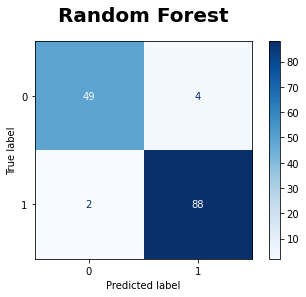

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.946809,0.988889,0.967391
1,KNN Classifier,0.930070,0.934783,0.955556,0.945055
2,Logistic Regression Scaled,0.986014,0.988889,0.988889,0.988889
3,KNN Classifier Scaled,0.979021,0.967742,1.000000,0.983607
4,SVC Classifier,0.629371,0.629371,1.000000,0.772532
5,SVC Scaled,0.972028,0.988636,0.966667,0.977528
6,Decision Tree,0.930070,0.944444,0.944444,0.944444
7,Random Forest,0.958042,0.956522,0.977778,0.967033
8,Random Forest maxDepth(4),0.958042,0.956522,0.977778,0.967033


In [54]:
# Import the required packacge
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Classifier model
rf_model= RandomForestClassifier(max_depth=4)
rf_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= rf_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["Random Forest maxDepth(4)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(rf_results_df, ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df